In [ ]:
#This analysis aims to explore multiple factors such as fertility rate, birth rate and population data amongst 
#different countries across the globe.

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('world-data-2023.csv')

In [3]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [6]:
df.shape

(195, 35)

In [7]:
#DATA CLEANING
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df = df[['Country', 'Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Physicians per thousand', 'Population']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  195 non-null    object 
 1   Birth Rate               189 non-null    float64
 2   Fertility Rate           188 non-null    float64
 3   Infant mortality         189 non-null    float64
 4   Life expectancy          187 non-null    float64
 5   Physicians per thousand  188 non-null    float64
 6   Population               194 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


In [11]:
#Population should be an integer type not an object, I will convert it into integer by firstly converting to string type
df['Population'] = df['Population'].astype(str).str.replace(',', '')

#Convert string to integer using 'coerce'
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  195 non-null    object 
 1   Birth Rate               189 non-null    float64
 2   Fertility Rate           188 non-null    float64
 3   Infant mortality         189 non-null    float64
 4   Life expectancy          187 non-null    float64
 5   Physicians per thousand  188 non-null    float64
 6   Population               194 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.8+ KB


In [14]:
#To overcome missing values, I will calculate the median values and populate missing values with the medians
columns_to_populate = ['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Physicians per thousand', 'Population']
median_values = df[columns_to_populate].median(numeric_only=True)
df[columns_to_populate] = df[columns_to_populate].fillna(median_values)

In [15]:
#Renaming columns for consistent formatting
df.rename(columns={'Birth Rate' : 'Birth_Rate'},inplace = True)
df.rename(columns={'Fertility Rate' : 'Fertility_Rate'},inplace = True)
df.rename(columns={'Infant mortality' : 'Infant_Mortality'},inplace = True)
df.rename(columns={'Life expectancy' : 'Life_Expectancy'},inplace = True)
df.rename(columns={'Physicians per thousand' : 'Physicians_Per_Thousand'},inplace = True)
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_Mortality',
       'Life_Expectancy', 'Physicians_Per_Thousand', 'Population'],
      dtype='object')

/Users/nasrinhasnath/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


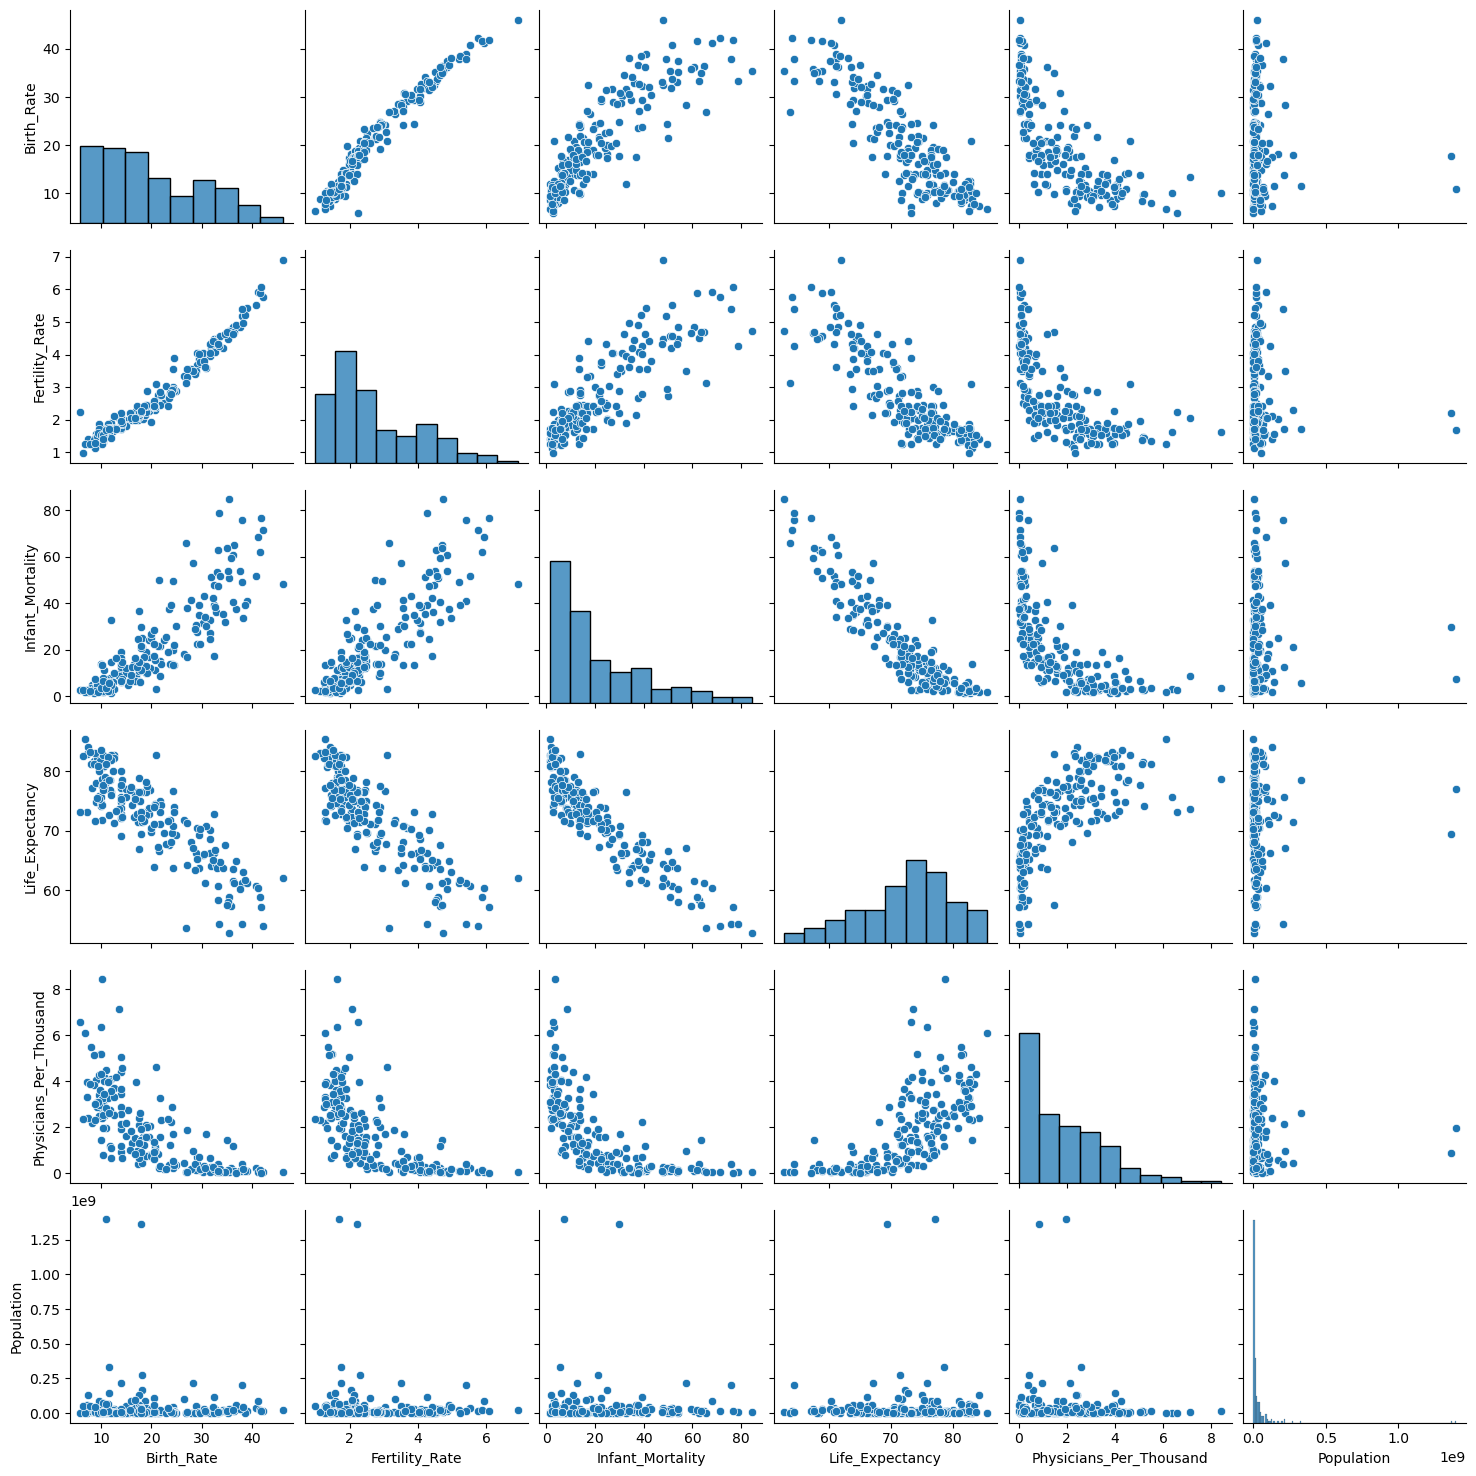

In [16]:
#Display pairplots to explore correlations
sns.pairplot(df)

In [ ]:
#VISUALISING THE DATA

Text(0.5, 1.0, 'Correlation Matrix')

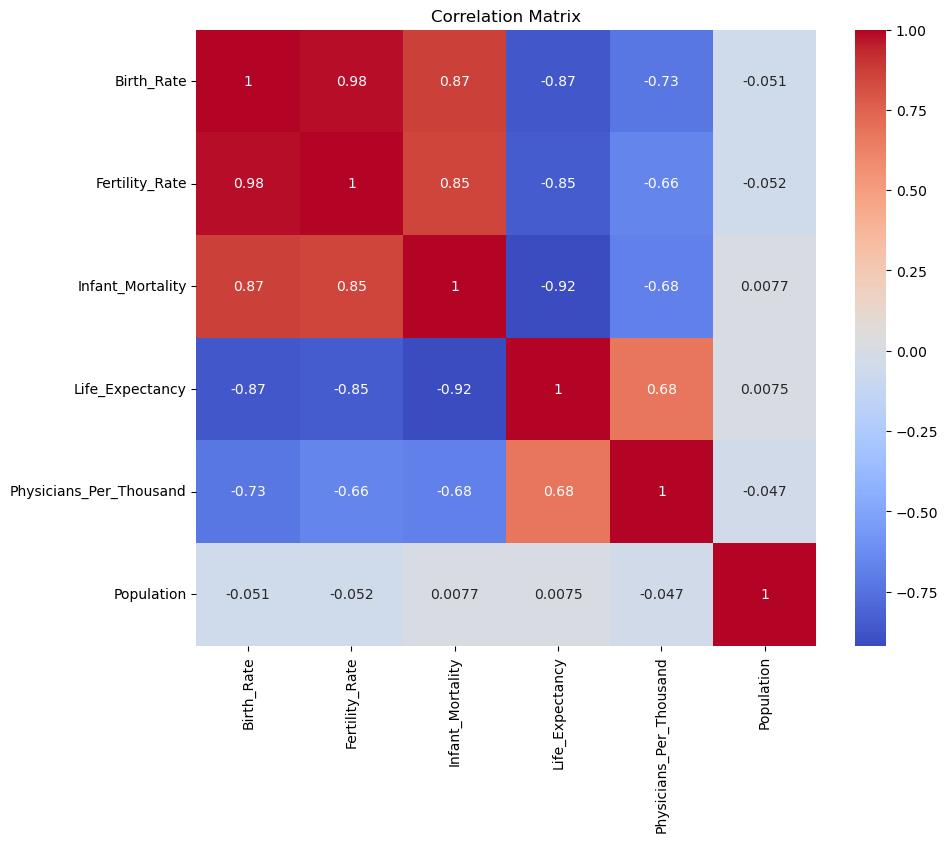

In [29]:
#Display correlation matrix heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')


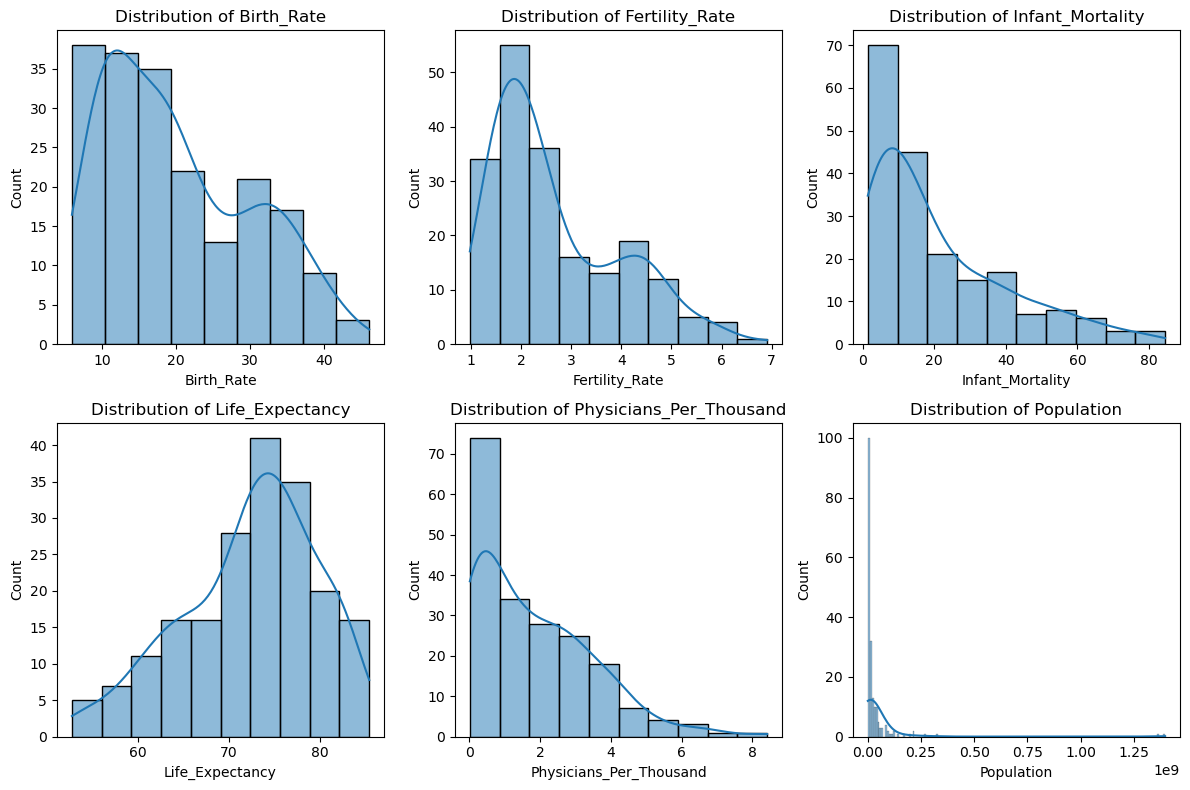

In [34]:
#Display distribution histograms
plt.figure(figsize=(12,8))
for column in df.columns[1:]:
    plt.subplot(2,3, df.columns.get_loc(column))
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

Text(0.5, 1.0, 'Scatter Plot of Birth Rate against Life Expectancy')

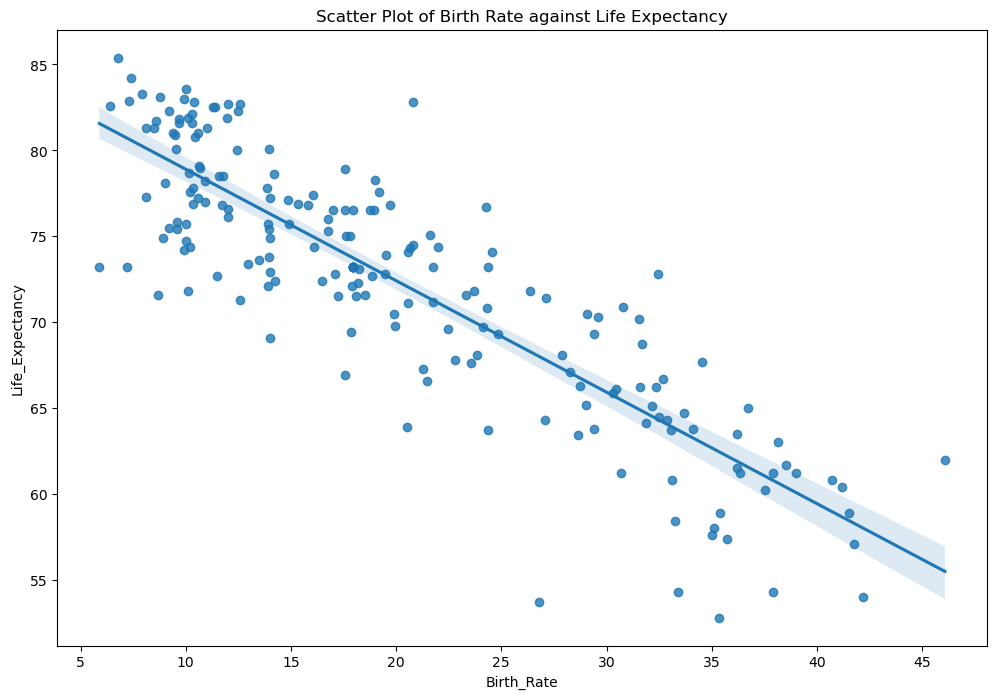

In [36]:
#Display scatter plot of Birth_Rate against Life_Expectancy
plt.figure(figsize=(12,8))
sns.regplot(data=df, x='Birth_Rate', y='Life_Expectancy')
plt.title('Scatter Plot of Birth Rate against Life Expectancy')

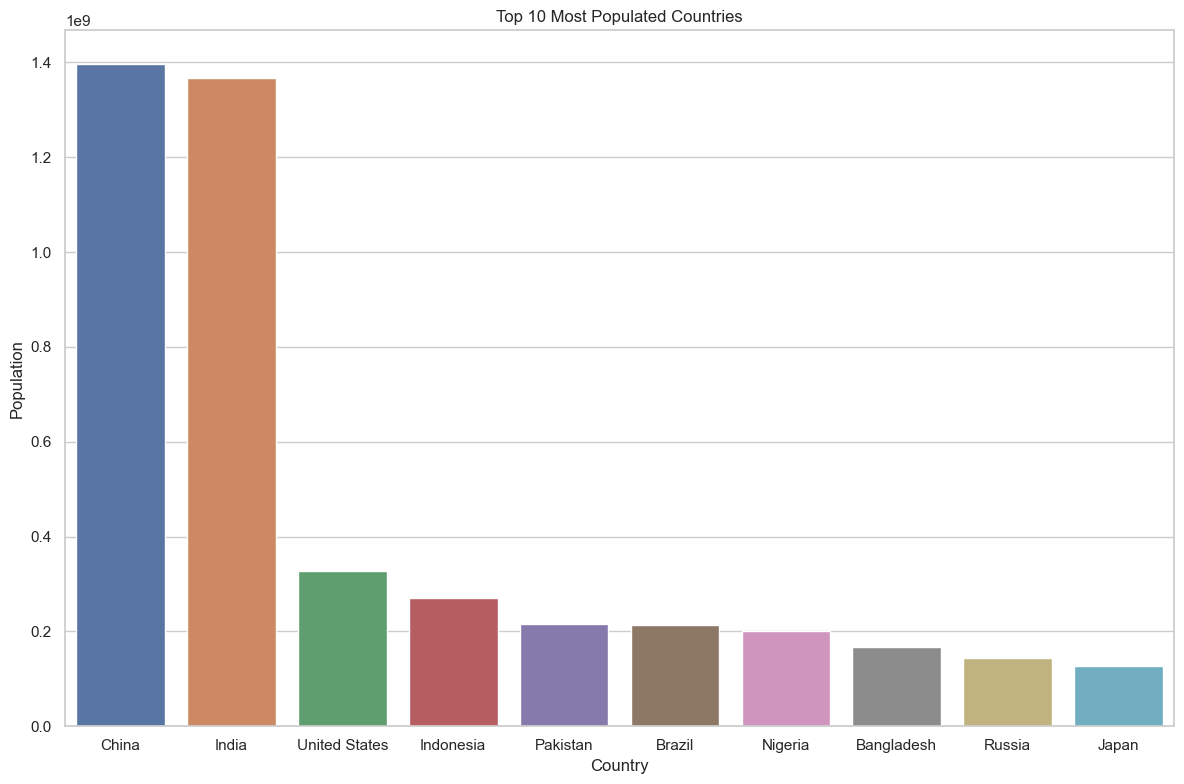

In [37]:
#Display the top 10 most populated countries
most_populated_countries = df.nlargest(10, 'Population')
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Country', y='Population', data = most_populated_countries)
ax.set_title(f'Top {10} Most Populated Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Population')

plt.tight_layout()
plt.show()

In [39]:
#Countries with the highest life expectancy
highest_le = df.groupby('Country')['Life_Expectancy'].max().nlargest(10)
print(highest_le)

Country
San Marino       85.4
Japan            84.2
Switzerland      83.6
Spain            83.3
Singapore        83.1
Liechtenstein    83.0
Italy            82.9
Israel           82.8
Norway           82.8
Australia        82.7
Name: Life_Expectancy, dtype: float64


In [41]:
#Compare birth rates with fertility rates
br_fr_comparison = df[['Country', 'Birth_Rate', 'Fertility_Rate']]
print(br_fr_comparison.head(20))

                Country  Birth_Rate  Fertility_Rate
0           Afghanistan       32.49            4.47
1               Albania       11.78            1.62
2               Algeria       24.28            3.02
3               Andorra        7.20            1.27
4                Angola       40.73            5.52
5   Antigua and Barbuda       15.33            1.99
6             Argentina       17.02            2.26
7               Armenia       13.99            1.76
8             Australia       12.60            1.74
9               Austria        9.70            1.47
10           Azerbaijan       14.00            1.73
11          The Bahamas       13.97            1.75
12              Bahrain       13.99            1.99
13           Bangladesh       18.18            2.04
14             Barbados       10.65            1.62
15              Belarus        9.90            1.45
16              Belgium       10.30            1.62
17               Belize       20.79            2.31
18          